# Tired Face AI : Detecting tired faces using YOLOv5

# Project Description
### The project aims to detect tired faces using YOLOv5. The model will be trained on a dataset of tired and awake faces and then used to detect tired faces in real time.

# 1. Install required libraries

# 1.1. Install YOLOv5

```bash

git clone https://github.com/ultralytics/yolov5

cd yolov5 & pip install -r requirements.txt
```

# 1.2. Install requirements
```bash
pip install -r requirements.txt
```

# 2. Load YOLOv5

In [1]:
import torch
import numpy as np
import cv2
import os
# os.environ["QT_QPA_PLATFORM"] = "wayland"


In [2]:
model = torch.hub.load('ultralytics/yolov5', 'yolov5s', pretrained=True)

Using cache found in /home/matthieu/.cache/torch/hub/ultralytics_yolov5_master
YOLOv5 🚀 2024-3-11 Python-3.10.12 torch-2.2.1+cpu CPU

Fusing layers... 
YOLOv5s summary: 213 layers, 7225885 parameters, 0 gradients, 16.4 GFLOPs
Adding AutoShape... 


In [3]:
model

AutoShape(
  (model): DetectMultiBackend(
    (model): DetectionModel(
      (model): Sequential(
        (0): Conv(
          (conv): Conv2d(3, 32, kernel_size=(6, 6), stride=(2, 2), padding=(2, 2))
          (act): SiLU(inplace=True)
        )
        (1): Conv(
          (conv): Conv2d(32, 64, kernel_size=(3, 3), stride=(2, 2), padding=(1, 1))
          (act): SiLU(inplace=True)
        )
        (2): C3(
          (cv1): Conv(
            (conv): Conv2d(64, 32, kernel_size=(1, 1), stride=(1, 1))
            (act): SiLU(inplace=True)
          )
          (cv2): Conv(
            (conv): Conv2d(64, 32, kernel_size=(1, 1), stride=(1, 1))
            (act): SiLU(inplace=True)
          )
          (cv3): Conv(
            (conv): Conv2d(64, 64, kernel_size=(1, 1), stride=(1, 1))
            (act): SiLU(inplace=True)
          )
          (m): Sequential(
            (0): Bottleneck(
              (cv1): Conv(
                (conv): Conv2d(32, 32, kernel_size=(1, 1), stride=(1, 1))
  

# 3. Testing the model on different images

image 1/1: 720x1280 2 persons, 2 ties
Speed: 1287.2ms pre-process, 93.7ms inference, 1.0ms NMS per image at shape (1, 3, 384, 640)


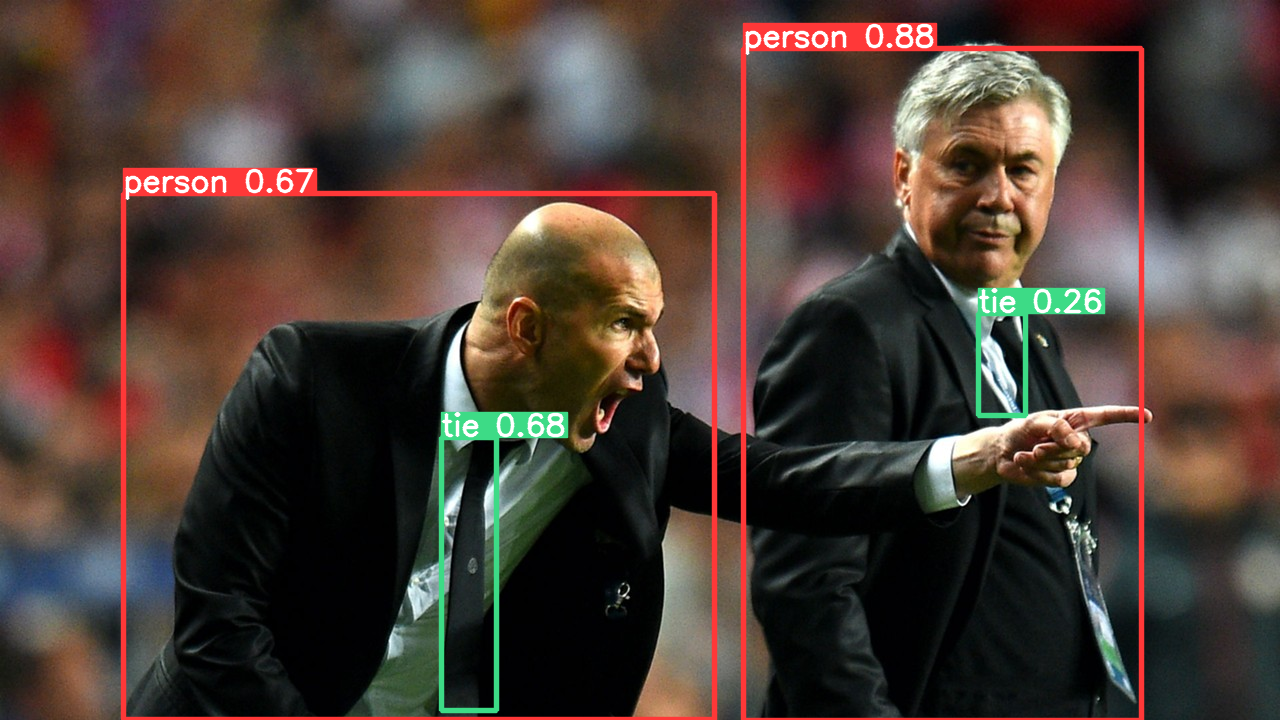

In [3]:
img = 'https://ultralytics.com/images/zidane.jpg'
results = model(img)
results.print()
results.show()

image 1/1: 467x700 4 persons
Speed: 10.5ms pre-process, 120.2ms inference, 1.2ms NMS per image at shape (1, 3, 448, 640)


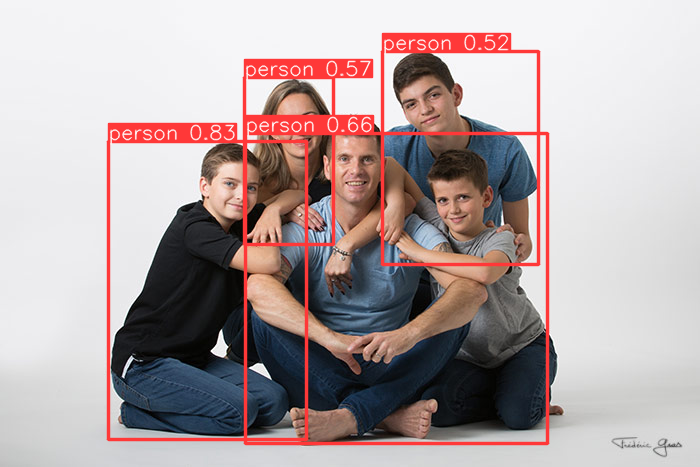

In [3]:
family = 'data/pictures/photographe-famille-versailles.jpg'
results = model(family)
results.print()
results.show()

image 1/1: 1068x1600 27 cars, 1 truck
Speed: 10.2ms pre-process, 87.6ms inference, 0.9ms NMS per image at shape (1, 3, 448, 640)


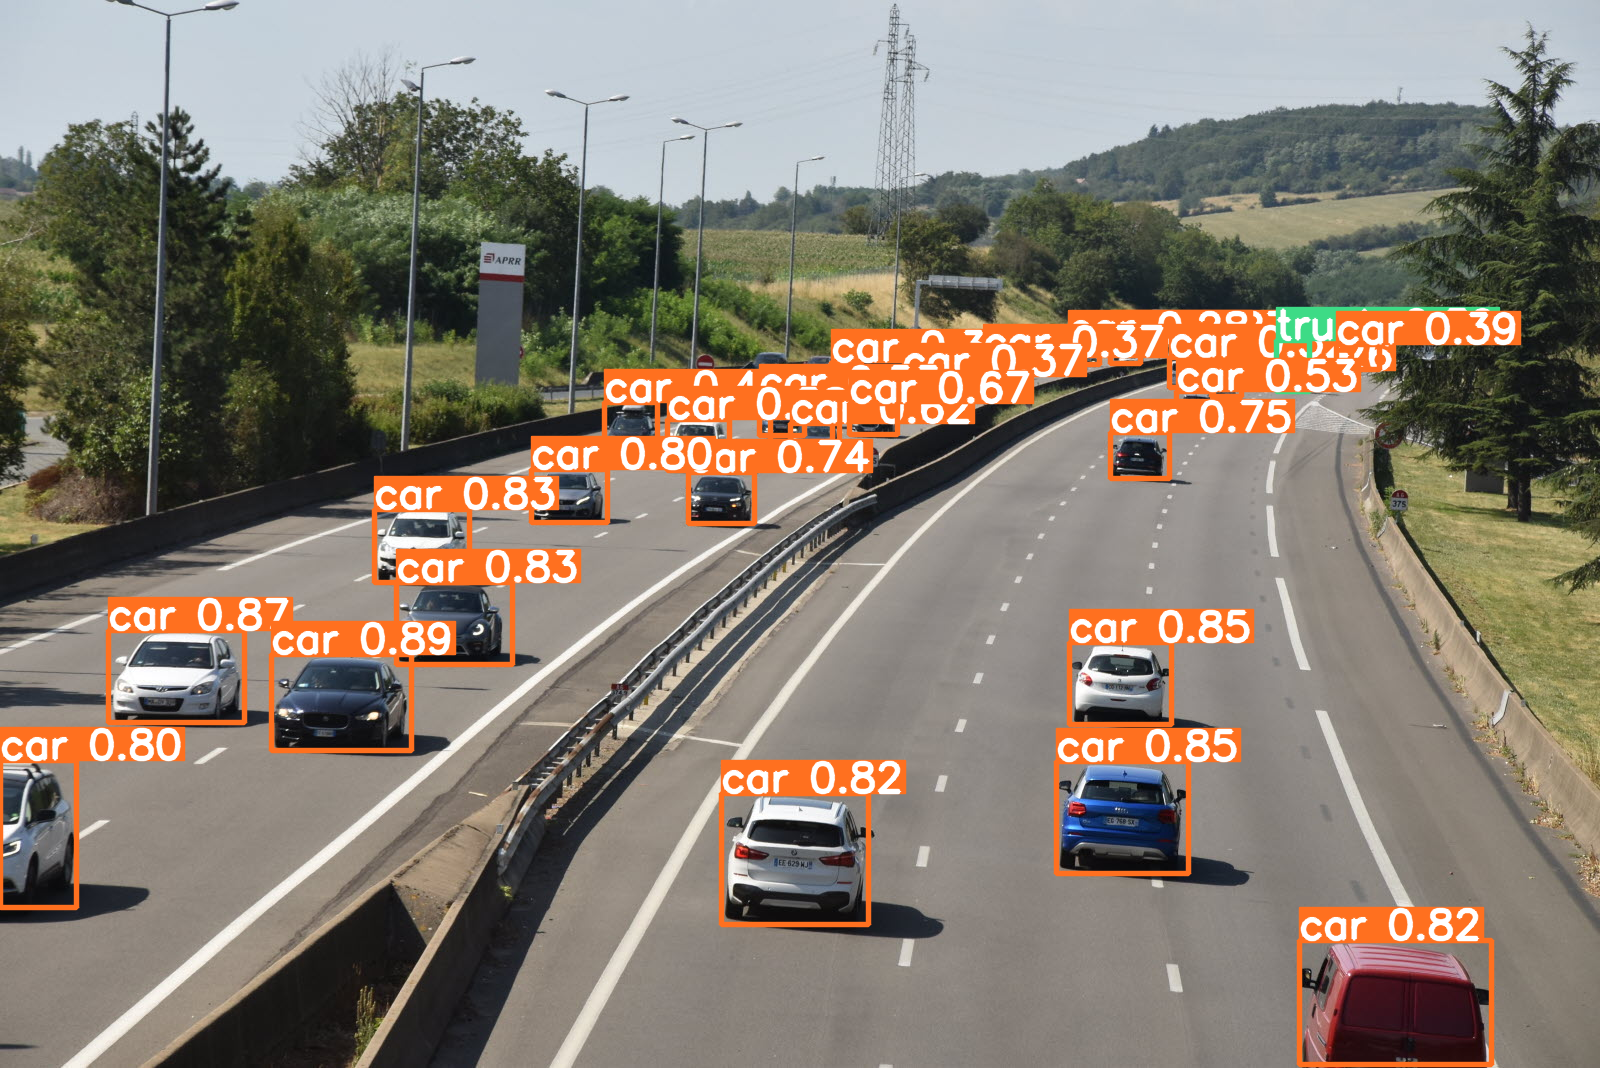

In [6]:
voiture = "data/pictures/voitureautoroute.jpg"
results = model(voiture)
results.print()
results.show()

In [7]:
results.xyxy[0]

tensor([[2.71555e+02, 6.54755e+02, 4.11217e+02, 7.50716e+02, 8.93803e-01, 2.00000e+00],
        [1.08941e+02, 6.30651e+02, 2.44320e+02, 7.22635e+02, 8.66881e-01, 2.00000e+00],
        [1.06988e+03, 6.42817e+02, 1.17200e+03, 7.24859e+02, 8.53688e-01, 2.00000e+00],
        [1.05697e+03, 7.61248e+02, 1.18831e+03, 8.73161e+02, 8.52427e-01, 2.00000e+00],
        [3.96353e+02, 5.82941e+02, 5.12255e+02, 6.64563e+02, 8.34405e-01, 2.00000e+00],
        [3.74289e+02, 5.09660e+02, 4.69282e+02, 5.82706e+02, 8.30615e-01, 2.00000e+00],
        [1.29940e+03, 9.40927e+02, 1.49155e+03, 1.06401e+03, 8.17788e-01, 2.00000e+00],
        [7.21454e+02, 7.93225e+02, 8.68338e+02, 9.24661e+02, 8.17736e-01, 2.00000e+00],
        [2.98193e-01, 7.60965e+02, 7.67864e+01, 9.07298e+02, 8.03253e-01, 2.00000e+00],
        [5.31239e+02, 4.69146e+02, 6.07574e+02, 5.22187e+02, 7.97372e-01, 2.00000e+00],
        [1.11034e+03, 4.32376e+02, 1.16917e+03, 4.78805e+02, 7.51689e-01, 2.00000e+00],
        [6.88919e+02, 4.72404e+0

Explanation of the results:

It's compose of 6 elements:

- X coordinate of the top-left corner of the bounding box
- Y coordinate of the top-left corner of the bounding box
- X coordinate of the bottom-right corner of the bounding box
- Y coordinate of the bottom-right corner of the bounding box
- Confidence score
- Class index (0 for person, 2 for car, 3 for motorcycle, 5 for bus, 7 for truck...)

In [8]:
print(np.array(results.render()).shape)
print(np.squeeze(results.render()).shape)

(1, 1068, 1600, 3)
(1068, 1600, 3)


# 4. Real-time detection

In [4]:
cap = cv2.VideoCapture(0)
while cap.isOpened():
    ret, frame = cap.read()
    
    results = model(frame)
    
    cv2.imshow('TiredFaceAI', np.squeeze(results.render()))
    
    if cv2.waitKey(10) & 0xFF == ord('q'):
        break
cap.release()
cv2.destroyAllWindows()

# 5. Training

### - We will collect images of tired and awake faces using OpenCV. We will collect 20 images for each class (tired and awake). (I will use my face ...)
### - We will label the images using labelImg.

# 5.1. Collecting images

In [10]:
import uuid
import time

# 5.1.1. Create a folder for images

```bash
mkdir data/images
```

In [11]:
IMAGES_PATH = "data/images"
labels = ['not_tired', 'tired']
number_imgs = 20

In [ ]:
cap = cv2.VideoCapture(0)
for label in labels:
    print(f'Collecting images for {label}')
    time.sleep(5)
    
    for img_num in range(number_imgs):
        print(f'Collecting images for {label} - Image number {img_num}')
        ret, frame = cap.read()
        imgname = os.path.join(IMAGES_PATH, label + '_' + f'{str(uuid.uuid1())}.jpg')
        cv2.imwrite(imgname, frame)
        cv2.imshow('TiredFaceAI', frame)
        time.sleep(3)
        
        if cv2.waitKey(1) & 0xFF == ord('q'):
            break
            
cap.release()
cv2.destroyAllWindows()

# 5.2. Annotating images

# 5.2.1. Install labelImg
### In the folder data, create a folder for annotations
    
```bash
mkdir data/labels
```

### Install labelImg

```bash
git clone https://github.com/tzutalin/labelImg
```

```bash
pip install pyqt5 lxml --upgrade
cd labelImg && pyrcc5 -o libs/resources.py resources.qrc
```

# 5.2.2. Annotate images

### Open labelImg and open the folder containing the images
```bash
cd labelImg
python labelImg.py
```

### Open data/images folder

![labelImg](data/pictures/Capture%20d’écran%20du%202024-03-11%2012-03-10.png)

### Be aware to select YOLO format in the annotation format

### Create or replace a file dataset.yaml in the yolov5 folder and add the following content
```yaml
# Train/val/test sets as 1) dir: path/to/imgs, 2) file: path/to/imgs.txt, or 3) list: [path/to/imgs1, path/to/imgs2, ..]
path: ../data  # dataset root dir
train: images  # train images (relative to 'path') 128 images
val: images  # val images (relative to 'path') 128 images
test:  # test images (optional)

# Classes (80 COCO classes)
names: [ "dog", "cat", "tv", "car", "person", "meatballs", "marinara sauce", "tomato soup", "chicken noodle soup",
         "french onion soup", "chicken breast", "ribs", "pulled pork", "hamburger", "cavity", "awake", "tired" ]
```


# 5.3. Training the model

### - We will use the following command to train the model
```bash
cd yolov5
python train.py --img 320 --batch 16 --epochs 500 --data dataset.yaml --weights yolov5s.pt
```

Explanation of the command:

- --img 320: Resize the images to 320x320
- --batch 16: Use a batch size of 16
- --epochs 500: Train the model for 500 epochs
- --data dataset.yaml: Use the dataset.yaml file to have configuration of the dataset
- --weights yolov5s.pt: Use the yolov5s.pt weights to initialize the model

# 6. Testing the model

In [3]:
model = torch.hub.load('ultralytics/yolov5', 'custom', path='yolov5/runs/train/exp3/weights/best.pt', force_reload=True)

Downloading: "https://github.com/ultralytics/yolov5/zipball/master" to /home/matthieu/.cache/torch/hub/master.zip
YOLOv5 🚀 2024-3-12 Python-3.10.12 torch-2.2.1+cpu CPU

Fusing layers... 
Model summary: 157 layers, 7055974 parameters, 0 gradients, 15.9 GFLOPs
Adding AutoShape... 


In [4]:
image_tired = 'data/pictures/pictures1.jpg'
results = model(image_tired)
results.print()

image 1/1: 720x1280 1 tired
Speed: 19.3ms pre-process, 101.8ms inference, 3.1ms NMS per image at shape (1, 3, 384, 640)


In [8]:
image_awake = 'data/pictures/pictures1.jpg'
results = model(image_awake)
results.print()

image 1/1: 720x1280 1 tired
Speed: 7.3ms pre-process, 74.1ms inference, 0.7ms NMS per image at shape (1, 3, 384, 640)


# 7. Real-time detection

In [ ]:
cap = cv2.VideoCapture(0)
while cap.isOpened():
    ret, frame = cap.read()
    
    results = model(frame)
    
    cv2.imshow('TiredFaceAI', np.squeeze(results.render()))
    
    if cv2.waitKey(10) & 0xFF == ord('q'):
        break
cap.release()
cv2.destroyAllWindows()